In [1]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1. Import and Understand Data

In [2]:
# Reading and inspecting the dataframe

h_data = pd.read_csv('train.csv')
h_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
h_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
#Rows and columns
h_data.shape

(1460, 81)

In [5]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Checking the Null values

h_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Checking number of unique values in each column.  
h_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [8]:
#Checking the value count

h_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [9]:
h_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
h_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [11]:
h_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### 2. Data Preparation (Encoding Categorical Variables, Handling Null Values)

#### Null values handling

In [12]:
df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00

In [13]:
## Treating  NaN Values
h_data['PoolQC'] = h_data['PoolQC'].fillna('No_Pool')
h_data['MiscFeature'] = h_data['MiscFeature'].fillna('None')
h_data['Alley'] = h_data['Alley'].fillna('No_Alley_Access')
h_data['Fence'] = h_data['Fence'].fillna('No_Fence')
h_data['FireplaceQu'] = h_data['FireplaceQu'].fillna('No_Fireplace')
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].fillna(0)
h_data['MasVnrType'] = h_data['MasVnrType'].fillna('None')
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['Electrical'] = h_data['Electrical'].fillna("Other")
h_data['LotFrontage'] = h_data['LotFrontage'].fillna(0)

In [14]:
# Imputing the Nan Values with 'No Basement' 
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    h_data[col] = h_data[col].fillna('No_Basement')

In [15]:
#Imputing the NaN values with 'No garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    h_data[col] = h_data[col].fillna('No_Garage')

In [16]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Performing EDA

### Univariate and Bivariate Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

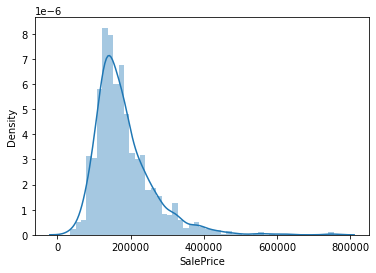

In [17]:
sns.distplot(h_data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

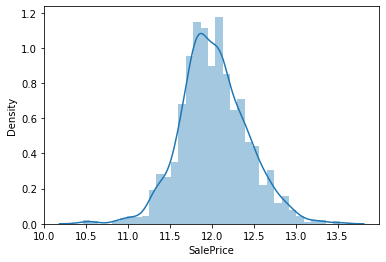

In [18]:
#Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data
#Log Transformation
h_data['SalePrice']=np.log1p(h_data['SalePrice'])
sns.distplot(h_data['SalePrice'])

Text(0.5, 1.0, 'Overall Condition')

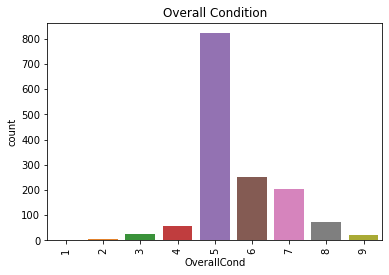

In [19]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

<AxesSubplot:xlabel='SalePrice'>

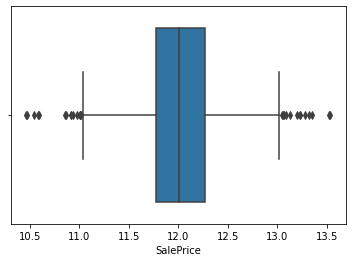

In [20]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=h_data)

Text(0.5, 1.0, 'Basement Condition')

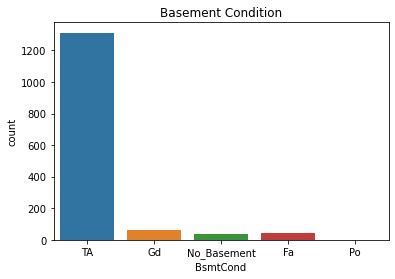

In [21]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

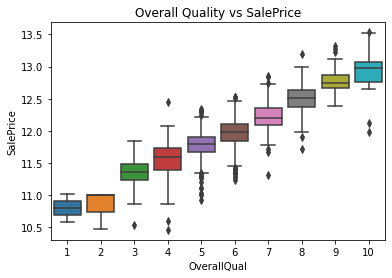

In [22]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

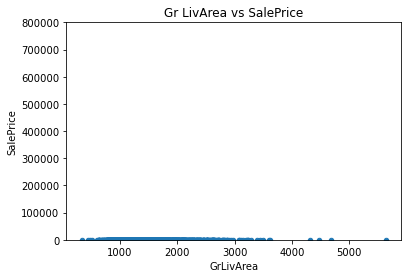

In [23]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

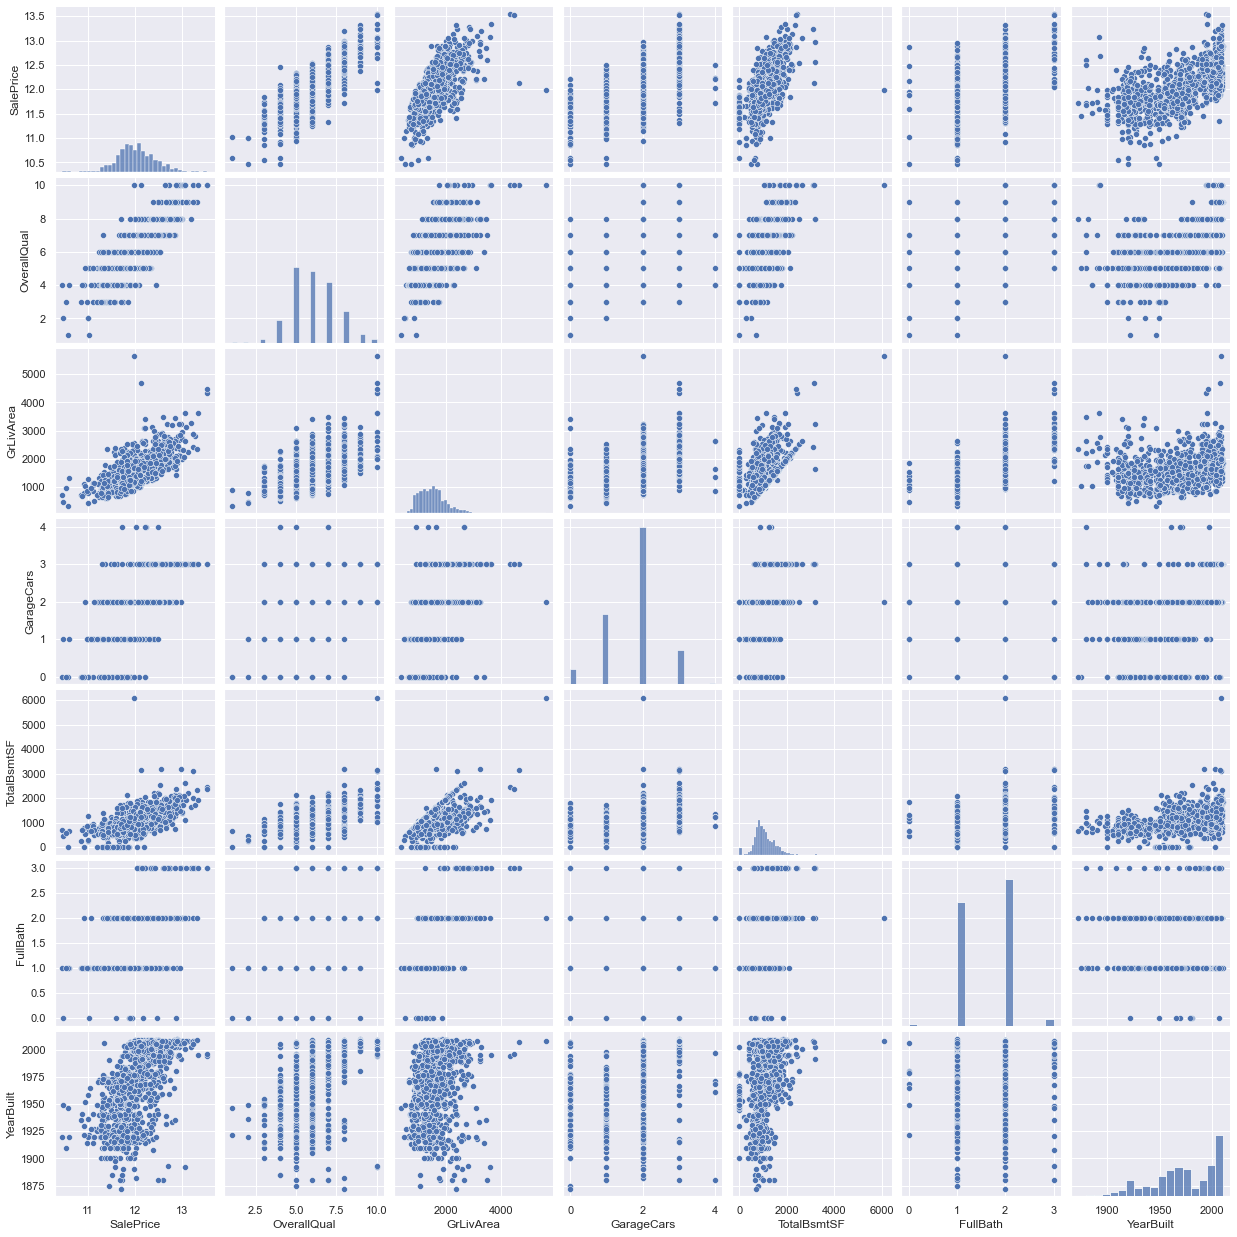

In [24]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

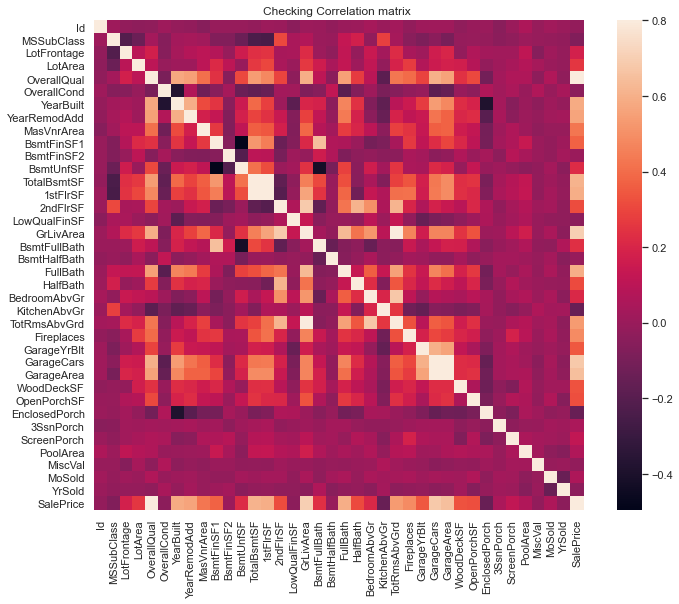

In [25]:
#checking the correlation matrix
corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

### Data Preperation

### Deriving Variables

In [26]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
#Converting Binary varibles into numeric datatypes
# mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' or x =='P' else 0)      

In [28]:
# extract category values
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

MSZoning            Alley LotShape LandContour Utilities LotConfig  \
0       RL  No_Alley_Access      Reg         Lvl    AllPub    Inside   
1       RL  No_Alley_Access      Reg         Lvl    AllPub       FR2   
2       RL  No_Alley_Access      IR1         Lvl    AllPub    Inside   
3       RL  No_Alley_Access      IR1         Lvl    AllPub    Corner   
4       RL  No_Alley_Access      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2  ...   FireplaceQu GarageType  \
0       Gtl      CollgCr       Norm       Norm  ...  No_Fireplace     Attchd   
1       Gtl      Veenker      Feedr       Norm  ...            TA     Attchd   
2       Gtl      CollgCr       Norm       Norm  ...            TA     Attchd   
3       Gtl      Crawfor       Norm       Norm  ...            Gd     Detchd   
4       Gtl      NoRidge       Norm       Norm  ...            TA     Attchd   

  GarageFinish GarageQual GarageCond   PoolQC     Fence MiscFeature SaleType  \
0          RFn         TA         TA  No_Pool  No_Fence        None       WD   
1          RFn         TA         TA  No_Pool  No_Fence        None       WD   
2          RFn         TA         TA  No_Pool  No_Fence        None       WD   
3          Unf         TA         TA  No_Pool  No_Fence        None       WD   
4          RFn         TA         TA  No_Pool  No_Fence        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 40 columns]

In [29]:
# convert category values into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No_Alley_Access  \
0            0            0            1            0                      1   
1            0            0            1            0                      1   
2            0            0            1            0                      1   
3            0            0            1            0                      1   
4            0            0            1            0                      1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  ...  \
0           0             0             0             1                0  ...   
1           0             0             0             1                0  ...   
2           0             0             0             0                0  ...   
3           0             0             0             0                0  ...   
4           0             0             0             0                0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 220 columns]

In [30]:
## Droping the 'Id' column 
df = h_data.drop(['Id'],axis=1)

In [31]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [32]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [33]:
df.shape

(1460, 260)

### Train Test Split

In [34]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [35]:
y_train = df_train.SalePrice
X_train = df_train.drop("SalePrice",1)

y_test= df_test.SalePrice
X_test = df_test.drop("SalePrice",1)

In [36]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [37]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

### Model Building

In [38]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [39]:
# Calculating the RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [40]:
col=X_train.columns[rfe.support_]
col

Index(['1stFlrSF', 'GarageYrBlt', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'Condition2_RRAn', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'BsmtCond_No_Basement', 'Functional_Sev',
       'GarageType_No_Garage', 'GarageFinish_No_Garage',
       'GarageQual_No_Garage', 'GarageCond_No_Garage', 'PoolQC_Gd'],
      dtype='object')

In [41]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.28e-217
Time:                        23:58:45   Log-Likelihood:                 37.844
No. Observations:                1021   AIC:                            -39.69
Df Residuals:                    1003   BIC:                             49.03
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10.7939      0.096    112.969      0.000      10.606      10.981
1stFlrSF                   0.2026      0.009     23.790      0.000       0.186       0.219
GarageYrBlt                2.6323      0.155     16.957      0.000       2.328       2.937
MSZoning_FV                0.7411      0.097      7.634      0.000       0.551       0.932
MSZoning_RH                0.5726      0.110      5.185      0.000       0.356       0.789
MSZoning_RL                0.6318      0.090      7.018      0.000       0.455       0.809
MSZoning_RM                0.5199      0.091      5.706      0.000       0.341       0.699
Condition2_PosN           -1.1091      0.239     -4.645      0.000      -1.578      -0.641
Condition2_RRAn           -0.4885      0.236     -2.073      0.038      -0.951      -0.026
RoofMatl_Membran           0.3668      0.236      1.557      0.120      -0.096       0.829
RoofMatl_Metal             0.1777      0.235      0.755      0.451      -0.284       0.640
RoofMatl_WdShngl           0.3562      0.119      3.004      0.003       0.123       0.589
Exterior1st_BrkComm       -0.5871      0.168     -3.494      0.000      -0.917      -0.257
Exterior1st_CBlock        -0.2744      0.236     -1.165      0.244      -0.737       0.188
BsmtCond_No_Basement      -0.3417      0.045     -7.591      0.000      -0.430      -0.253
Functional_Sev            -0.3753      0.236     -1.593      0.111      -0.838       0.087
GarageType_No_Garage       2.7582      0.167     16.518      0.000       2.431       3.086
GarageFinish_No_Garage     2.7582      0.167     16.518      0.000       2.431       3.086
GarageQual_No_Garage       2.7582      0.167     16.518      0.000       2.431       3.086
GarageCond_No_Garage       2.7582      0.167     16.518      0.000       2.431       3.086
PoolQC_Gd                 -2.0500      0.246     -8.321      0.000      -2.533      -1.567
==============================================================================
Omnibus:                       29.039   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.579
Skew:                           0.354   Prob(JB):                     5.11e-08
Kurtosis:                       3.537   Cond. No.                     6.38e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Ridge Regression

In [43]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08907535164510516


In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.007019      0.002415         0.002657        0.001712      0.0001   
1        0.009866      0.006356         0.001402        0.000798       0.001   
2        0.007595      0.007020         0.003126        0.006251        0.01   
3        0.006447      0.003400         0.005887        0.004902        0.05   
4        0.007631      0.000895         0.002433        0.000534         0.1   
5        0.007566      0.007163         0.000248        0.000496         0.2   
6        0.007246      0.006233         0.003726        0.005400         0.3   
7        0.003474      0.002869         0.000799        0.000979         0.4   
8        0.010734      0.003372         0.001967        0.001069         0.5   
9        0.006425      0.000987         0.003102        0.000508         0.6   
10       0.007602      0.000672         0.002564        0.000452         0.7   
11       0.007429      0.001058         0.002573        0.000388         0.8   
12       0.006937      0.000520         0.002585        0.000483         0.9   
13       0.006898      0.000839         0.002583        0.000494         1.0   
14       0.007087      0.001240         0.002808        0.000515         2.0   
15       0.007048      0.000874         0.002882        0.000583         3.0   
16       0.008531      0.002159         0.002418        0.000456         4.0   
17       0.007037      0.001447         0.002619        0.000791         5.0   
18       0.008830      0.006547         0.002422        0.001212         6.0   
19       0.006701      0.001014         0.002696        0.000879         7.0   
20       0.007239      0.000738         0.002718        0.000382         8.0   
21       0.007966      0.005427         0.002390        0.001595         9.0   
22       0.005422      0.003448         0.004220        0.006053        10.0   
23       0.004931      0.003075         0.004324        0.005702          20   
24       0.003125      0.006249         0.003304        0.006609          50   
25       0.005350      0.008041         0.003982        0.006754         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.090396          -0.097029   
1    {'alpha': 0.001}          -0.090161          -0.096963   
2     {'alpha': 0.01}          -0.089553          -0.096516   
3     {'alpha': 0.05}          -0.089161          -0.095626   
4      {'alpha': 0.1}          -0.089141          -0.095104   
5      {'alpha': 0.2}          -0.089693          -0.094782   
6      {'alpha': 0.3}          -0.090519          -0.094778   
7      {'alpha': 0.4}          -0.091150          -0.094808   
8      {'alpha': 0.5}          -0.091639          -0.094846   
9      {'alpha': 0.6}          -0.091947          -0.094860   
10     {'alpha': 0.7}          -0.092172          -0.094904   
11     {'alpha': 0.8}          -0.092327          -0.094960   
12     {'alpha': 0.9}          -0.092432          -0.095016   
13     {'alpha': 1.0}          -0.092504          -0.095077   
14     {'alpha': 2.0}          -0.092532          -0.095627   
15     {'alpha': 3.0}          -0.092508          -0.095858   
16     {'alpha': 4.0}          -0.092292          -0.095920   
17     {'alpha': 5.0}          -0.091980          -0.095988   
18     {'alpha': 6.0}          -0.091669          -0.096088   
19     {'alpha': 7.0}          -0.091481          -0.096154   
20     {'alpha': 8.0}          -0.091341          -0.096236   
21     {'alpha': 9.0}          -0.091215          -0.096344   
22    {'alpha': 10.0}          -0.091100          -0.096479   
23      {'alpha': 20}          -0.091019          -0.097215   
24      {'alpha': 50}          -0.090236          -0.098320   
25     {'alpha': 100}          -0.089200          -0.099757   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0           -0.095085          -0.088795  ...        -0.090794   
1        

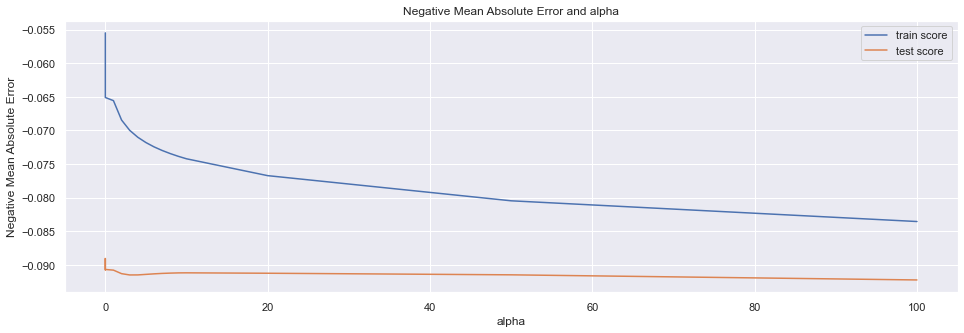

In [46]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [47]:
#final ridge model
alpha = 0.1

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.87925729e-02, -2.58583687e-03,  3.05802656e-02,  5.69509117e-03,
        5.66053105e-02,  3.78946878e-02,  5.40272616e-02,  2.26170007e-02,
        4.37392727e-04,  2.71830830e-02,  8.68182964e-03,  7.41724127e-03,
        3.80050161e-02,  1.20723861e-02,  4.61317664e-02,  4.81230085e-02,
        7.81621985e-04,  7.39571128e-02,  1.46546814e-02,  5.66358706e-04,
        6.13695372e-03,  2.29931369e-03,  9.48165759e-03, -1.37523082e-02,
        4.05314973e-03, -3.48431454e-03, -1.37166786e-02,  2.02280181e-02,
        1.77682936e-02,  5.39775191e-03,  1.04341715e-02,  4.01793661e-03,
        7.29497153e-03,  5.28031621e-03,  8.14330003e-03,  1.22575777e-02,
        2.63002098e-03,  9.43051134e-04, -3.19703491e-03,  4.02024808e-01,
        3.96073434e-01,  4.02255916e-01,  3.54484609e-01,  2.22654714e-02,
        3.64977186e-02,  1.45623243e-02, -1.74869746e-02,  7.64664010e-03,
        1.94716699e-02,  1.13736459e-02,  3.29690063e-02, -9.99745065e-02,
        2.72685821e-02, -

In [48]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9575540290123392


In [49]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.7513158677921242


### Lasso Regression

In [50]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [52]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08352151268668084


In [53]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [54]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9173832743598324


In [55]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.856690367324216


In [56]:
mean_squared_error(y_test, y_test_pred)

0.02357986852085152

In [57]:
lasso.coef_

array([-0.0161577 , -0.00282854,  0.01800881,  0.00737215,  0.08952628,
        0.04464447,  0.04921812,  0.02201856,  0.        ,  0.        ,
        0.        ,  0.        ,  0.02791494,  0.01262608,  0.        ,
        0.        , -0.00292742,  0.11740312,  0.03130109,  0.00187639,
        0.01350215,  0.00874101,  0.00633696, -0.01098727,  0.01359534,
        0.00608655, -0.        ,  0.03933938,  0.00483091,  0.00662663,
        0.01257543, -0.        ,  0.00608759,  0.00554473,  0.01050822,
       -0.01320881, -0.00094386, -0.00122244, -0.00603634,  0.        ,
        0.        ,  0.0465295 , -0.00741001,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.00196077, -0.        ,  0.0263783 , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.0056615 ,  0.03825882, -0.        ,  0.10720872, -0.05364037,
       -0.        , -0.02497388, -0.        , -0.        , -0.  

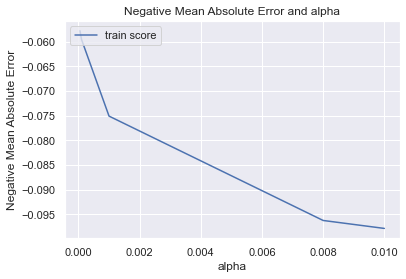

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Model comparison

In [59]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [60]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0          MSSubClass  10.802879
115  RoofMatl_Membran   0.434934
42        MSZoning_RL   0.402256
40        MSZoning_FV   0.402025
41        MSZoning_RH   0.396073
43        MSZoning_RM   0.354485
116    RoofMatl_Metal   0.306131
117     RoofMatl_Roll   0.302864
120  RoofMatl_WdShngl   0.293684
93    Condition2_PosA   0.251381

In [61]:
model_parameter2 = list(lasso.coef_)
model_parameter2.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter2)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0              MSSubClass  11.874875
18           BsmtFullBath   0.117403
64   Neighborhood_Crawfor   0.107209
79   Neighborhood_Somerst   0.097597
5             OverallCond   0.089526
74   Neighborhood_NridgHt   0.078916
84        Condition1_Norm   0.054906
123   Exterior1st_BrkFace   0.053649
173       BsmtExposure_Gd   0.049641
7            YearRemodAdd   0.049218

In [62]:
# Best alpha value for Ridge : {'alpha': 0.1}
# Best alpha value for Lasso : {'alpha': 0.001}